### House Price Prediction Project¶
This notebook trains a simple regression model to predict house prices based on selected features, and saves it as a .pkl file for use in Streamlit.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [65]:
# Load dataset
df=pd.read_csv("/home/rgukt/datasets/train (1).csv")

In [38]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
# Select relevant features and drop rows with missing values

df = df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
df = df.dropna()
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
11,60,RL,85.0,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,New,Partial,345000
13,20,RL,91.0,10652,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,New,Partial,279500


In [45]:

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
X = df[features]
y = df['SalePrice']

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

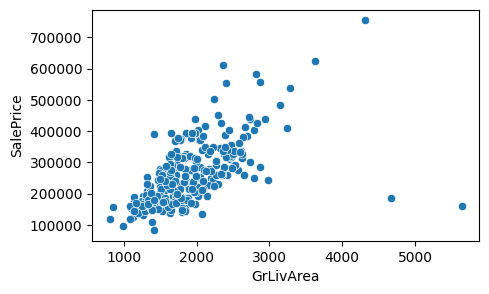

In [49]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="GrLivArea",y="SalePrice",data=df)

In [68]:
# Split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
#Train the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
#Evaluate the model
y_pred=model.predict(X_test)

In [63]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [64]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 1602914819.443908
R-squared Score: 0.7910239048318479
RMSE: 40036.4186640602


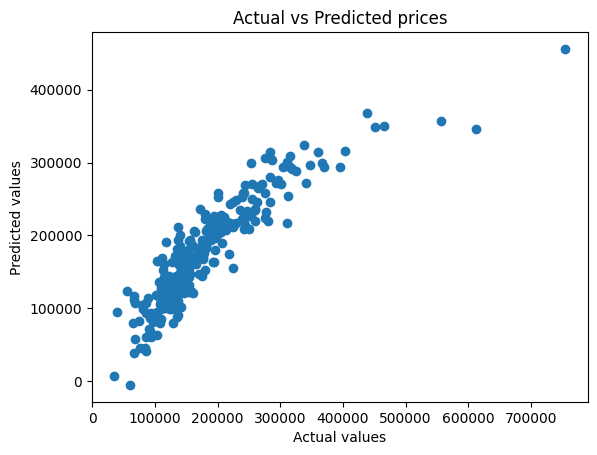

In [53]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted prices')
plt.show()

In [56]:
import joblib

In [70]:
#Save the model to a file
joblib.dump(model, 'house_price_model.pkl')
print("Model saved as house_price_model.pkl")

Model saved as house_price_model.pkl


In [71]:
# Load the model
model = joblib.load('house_price_model.pkl')
new_data = [[1500, 7, 2, 800]] 
prediction = model.predict(new_data)

print("Predicted House Price: ₹", int(prediction[0]))


Predicted House Price: ₹ 55299320


/home/rgukt/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
!streamlit run app.py

/bin/bash: streamlit: command not found
